#Problem#2 : Gender Recognizer with Bangla Hand Written Digits 
Applying **Neural Network / Deep Neural Network** for the Ekush dataset and build a **binary classification model** that can predict male/female from Bengali handwritten digits with different hyperparameter settings.


##Neural Network / Deep Neural Network:
When we hear the name Neural Network, we feel that it consist of many and many hidden layers but there is a type of neural network with a few numbers of hidden layers. Shallow neural networks consist of only 1 hidden layer.
<div align="center">
<img src="https://drive.google.com/uc?id=1XVCMw53tNG8PdhVYoA4Dpds_j4SL8XTl" width="300">
</div>
On the other hand, deep neural networks consist of many hidden layers.
<div align="center">
<img src="https://drive.google.com/uc?id=1K502pEPXeVQ1eQkQWATNeBpOW7S8ZISj" width="400">

</div>


###Neuron:
The neuron is the atomic unit of a neural network. Given an input, it provides the output and passes that output as an input to the subsequent layer.A neuron can be thought of as a combination of 2 parts:
The first part computes the output , using the inputs and the weights.
The second part performs the activation on the output to give out the final output of the neuron.
###Hidden Layer:
The hidden layer comprises of various neurons, each of which performs the above 2 calculations.




##Dataset: 
**Ekush** is a Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features. One of them is to recognize gender using handwritten bangla digits.

Dataset link:  https://shahariarrabby.github.io/ekush/#home

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="400">
</div>

- **input dimension:**
  - Size of an image: $28 \times 28 = 784$
- **output dimension: 2**
  - Class will be male or female i.e. 0 or 1. So, if a sample is non-male so, it is female. No need to classify separately.


The steps to implement gender recognizer with bangla hand written digits will be the following:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

#to access dataset csv files
import pandas as pd

#to process dataset and path
import os
from os import path
import shutil

##Step#1: Load the dataset:

The Ekush dataset is loaded from Google Drive. At first we have mounted the drive and then loaded the dataset. 

In [2]:
'''
LOADING DATASET
'''
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In Ekush Dataset there are multiple csv files for different use. As, we are working with Bangla Handwritten digits. We need only two csv files that are "femaleDigits.csv" and "maleDigits.csv".

In [3]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/My Drive/Soft Computing/ekushCSV/"
os.listdir(data_path)

['femaleDigits.csv', 'maleDigits.csv']

In [4]:
CUDA_LAUNCH_BLOCKING="1" #for cuda error: device side assert triggered

def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(data_path + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [5]:
male_csv = showRawTrainingSamples('femaleDigits.csv')
female_csv = showRawTrainingSamples('maleDigits.csv')

femaleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)
maleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


In [6]:
female_csv.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


In [7]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112


##Step#2: Prepare(augment) the dataset:

The dataset needs to be prepared in a way that we can easily access to train our model. So, we need to merge the csv files into one. And before that we need to give label for each gender. 

- We have added a column named "**gender**" in each csv files. 
- In gender column, **male** hand written digits that exists in "maleDigits.csv" are labeled as **"0"** . Contrary, **females** are label as **"1"** in "femaleDigits.csv".
-Then, Csv files are merged into one, named **"train.csv"**. 

In [8]:
def addcolumn(csv_filename,label):
  df = pd.read_csv(data_path + csv_filename)
  df["gender"] = label
  df.to_csv("sample.csv", index=False)
  return df

In [9]:
male_csv =addcolumn('femaleDigits.csv',1)
female_csv = addcolumn('maleDigits.csv',0)


In [10]:
female_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112,0
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112,0
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112,0
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112,0


In [11]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112,1
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112,1
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112,1
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112,1
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112,1


In [12]:
total_csv = [male_csv, female_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30830


In [13]:
merged_csv.to_csv("train.csv", index=False)

In [14]:
pd.read_csv("train.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112,1
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112,1
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112,1
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112,1
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30825,125,146,133,134,128,107,119,122,72,69,70,114,71,89,108,77,64,65,62,56,62,60,62,131,92,56,59,58,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,7,179,220,60,0,2,1,0,0,0,0,0,0,0,0,0,0,121,0
30826,0,0,0,0,0,1,1,5,47,56,20,2,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,210,252,215,26,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,67,211,102,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,121,0
30827,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,...,0,70,231,255,253,255,61,0,4,1,0,2,6,0,1,1,0,0,0,6,2,2,1,3,0,1,1,1,7,0,46,210,238,99,4,4,1,0,121,0
30828,0,1,1,4,2,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,137,193,200,80,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,141,236,183,127,19,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,121,0


##Step#3: Compose transforms

In [15]:
# Library
import pandas as pd
import numpy as np

# Load Data
train = pd.read_csv("train.csv")

# Separating Data and Label
Y_train = train["gender"]
X_train = train.drop(labels = ["gender","label"],axis = 1)


# Normalize the data
X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(-1,28,28)

In [16]:
from torch import nn
import torch
from torch import tensor

x_data=tensor(X_train)
y_data=tensor(Y_train)

train_dataset=  [ [0]*2 for i in range(len(x_data))]
print(len(train_dataset))

for i in range(len(x_data)):
  train_dataset[i][0]= x_data[i]
  train_dataset[i][1] = y_data[i].item()

30830


Showing the information of one sample data and the images:

In [17]:
print(train_dataset[0])

[tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000, 0.0078,
         0.0157, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0039, 0.0039, 0.0118, 0.0039, 0.0000, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0078, 0.0078, 0.0078, 0.0196, 0.0039,
         0.0000, 0.0000, 0.1294, 0.3098, 0.6431, 0.6275, 0.6353, 0.6706, 0.3216,
         0.2471, 0.1843, 0.0078, 0.0157, 0.0157, 0.0039, 0.0078, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0157, 0.0078, 0.0000, 0.0314,
         0.3216, 0.6157, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 0.8706, 0.4235, 0.0000, 0.0235, 0.0118, 0.0039, 0.0039, 0.0039,
         0.0000],
        [0.0000, 0.0000, 0.0039, 0.0039, 0.0118, 0.0000, 0.0235, 0.2941, 0.7647,
         1.0000, 1.0000, 0.6667, 0.5137, 0.5255, 0.4941, 0.7843, 0.9020, 0.8784,
         0.9333, 1.0000, 0.8196, 0.1569, 0.0000, 0.015

0


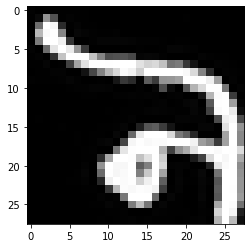

In [18]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = X_train[30829]
print(Y_train[30829])
plt.imshow(show_img, cmap='gray')

0


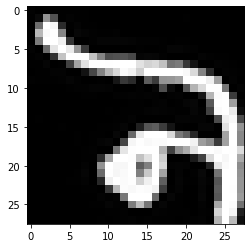

In [19]:
show_img = train_dataset[30829][0]
print(train_dataset[30829][1])
plt.imshow(show_img, cmap='gray')

In [20]:
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.1+cu101
Tesla T4


In [21]:
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

##Step#4 : Make Data Iterable

- We split the training set to 90% and test set to 10%. That means a 90:10 ratio. To split the data we have used **`torch.utils.data.sampler`** class.
- We will use the **DataLoader** class to make our dataset iterable. 

In [141]:
import numpy as np
#batch size

batch_size =64 #32 # 64   #45
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:434
Test dataloader:49


##Step#5: Create the Model Class

In order to set up the model class, we need to initialize the model type and declare the forward pass. 

We initialize our model with this linear layer: **`torch.nn.Linear(input_size, num_classes)`** which
applies a linear transformation to the incoming data:  $y=W^T∗x+b$.

Parameters:

- input_size – size of each input sample (i.e. size of x)
- num_classes – size of each output sample (i.e. size of y)
- bias – If set to False, the layer will not learn an additive bias. Default: True

In this setting, We have initiliaze our model with two hidden layers. And in each hidden layer we have used **ReLu** as activation fuction. It Applies the rectified linear unit function element-wise:

$\text{ReLU}(x) = (x)^+ = \max(0, x) $

<div align="center">
<img src="https://drive.google.com/uc?id=1wKFWSYXY7leTqAxoeKBtpyMtJCqEF1bs" width="500">
</div>



Next is to define the forward pass function. The forward pass refers to the calculation process of the output data from the input. 

The complete model class is defined below:


In [154]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden_1,num_hidden_2):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden_1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 100
        self.linear_2 = nn.Linear(num_hidden_1, num_hidden_2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### Output layer: 100 --> 2
        self.linear_out = nn.Linear(num_hidden_2, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


##Step#6:Instantiate the Model Class

####**Modelparameter:**
Model parameters are learned during training when we optimize a loss function using something like gradient descent.

####**Hyperparameter:**
Parameters which define the model architecture are referred to as hyperparameters. Hyperparameters are not model parameters and they cannot be directly trained from the data. 
These values are fixed before the training of the data begins. They deal with parameters such as learning_rate,num_iters etc.

- **learning_rate**: How quickly the model should be able to learn, how complicated the model is, and so on. 
- **num_iters**: It is used to specify the number of combinations that are randomly tried. If num_iters is too less, finding the best combination is difficult, and if num_iters is too large, the processing time increases. It is important to find a balanced value for ‘n_iter’.
  - **1 iteration**: One mini-batch forward & backward pass. That means a parameter (wights and biases) update. 
- **minibatch**:  Number of examples in 1 iteration
- **epochs**: How many times we are running the dataset

  - **1 epoch**: Running through the whole dataset once
- **num_hiddden**: number of nodes in a hidden layer. It can vary in every hidden layer.
Before instantiation, we’ll initialize some hyperparameters like following.

In [155]:
# Hyperparameters

batch_size = 64
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden_1=200
num_hidden_2=100
output_dim = 2

learning_rate = 0.1
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Instantiating the model class and enabling GPU:

In [157]:

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden_1 = num_hidden_1,
                               num_hidden_2=num_hidden_2)

# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)

##Step#7: Construct loss and optimizer (select from PyTorch API)

We need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

Here we used **Stochastic gradient descent(SGD)** as our optimizer that makes forward and backward propagation for every record.  Although there are different optimizers SGD can work well for our model.

In [38]:
# INSTANTIATE OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##Step#8 : Training: forward, loss, backward, step



- Calling `.backward()` mutiple times accumulates the gradient (**by addition**) for each parameter. 

- This is why you should call `optimizer.zero_grad()` after each .step() call. 

- Note that following the first `.backward` call, a second call is only possible after you have performed another **forward pass**.

- `optimizer.step` performs a parameter update based on the current gradient (**stored in .grad attribute of a parameter**)

Simplified equation:

- `parameters = parameters - learning_rate * parameters_gradients`
- parameters $W$ and $b$ in ($y = W^T * x + b$)
- $\theta = \theta - \eta \cdot \nabla_\theta$  [ General parameter $\theta$ ]
  *  $\theta$ : parameters (our variables)
  *  $\eta$ : learning rate (how fast we want to learn)
  *  $\nabla_\theta$ : parameters' gradients

###Setting1:Two Layer Neural Network (Deep) with ReLU Activation  (Accuracy 61.43%)

batch size =64 ,iteration=5000,nodes per hidden layer=200 and 100 learning rate= 0.1

In [63]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

10


In [64]:


iter = 0
iteration_loss=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7041105031967163. Accuracy: 57.606227700291925
Iteration: 1000. Loss: 0.6457722187042236. Accuracy: 59.32533246837496
Iteration: 1500. Loss: 0.6419939398765564. Accuracy: 60.84982160233539
Iteration: 2000. Loss: 0.6266242265701294. Accuracy: 60.3957184560493
Iteration: 2500. Loss: 0.6200777292251587. Accuracy: 61.401232565682776
Iteration: 3000. Loss: 0.6801530122756958. Accuracy: 60.3957184560493
Iteration: 3500. Loss: 0.5372962355613708. Accuracy: 61.33636068764191
Iteration: 4000. Loss: 0.5117058157920837. Accuracy: 61.43366850470321


#### Plot of predicted and actual values

[0.7041105031967163, 0.6457722187042236, 0.6419939398765564, 0.6266242265701294, 0.6200777292251587, 0.6801530122756958, 0.5372962355613708, 0.5117058157920837]


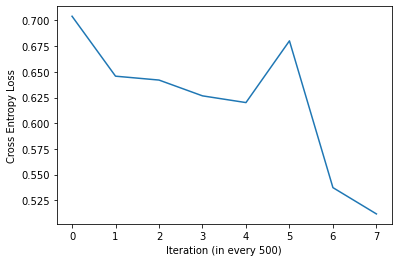

In [65]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [41]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Soft Computing/'

Mounted at /content/gdrive


In [66]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'A2_Problem2_setting3.pkl') 

####Loading Model

In [67]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'A2_Problem2_setting3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


###Setting2: Three Layer Neural Network (Deep) with LeakyReLU Activation (Accuracy 62.56%)

batch size =32 ,iteration=15000,num of nodes per hidden layer=200, learning rate= 0.01




In [69]:
# Hyperparameters

batch_size = 32
num_iters = 15000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden=200
learning_rate = 0.01
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [70]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

15


Here we have used three hidden layers. And in each layer we have used LeakyReLU activation function. 
This function applies the element-wise function:

$\text{LeakyReLU}(x) = \max(0, x) + \text{negative_slope} * \min(0, x)$

or

$\text{LeakyRELU}(x) = \begin{cases} x, & \text{ if } x \geq 0 \\ \text{negative_slope} \times x, & \text{ otherwise } \end{cases}$


<div align="center">
<img src="https://drive.google.com/uc?id=1mrXVaeMrCaMXDRy8-ZrBkyKY-qeYq9ki" width="500">
</div>


In [71]:

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.leaky_relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.leaky_relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.leaky_relu_3 = nn.LeakyReLU()

        ### Output layer: 200 --> 2
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.leaky_relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.leaky_relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.leaky_relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6911079287528992. Accuracy: 51.34609146934804
Iteration: 1000. Loss: 0.6847718954086304. Accuracy: 56.2763542004541
Iteration: 1500. Loss: 0.677521824836731. Accuracy: 56.60071359065845
Iteration: 2000. Loss: 0.6492515802383423. Accuracy: 59.065844956211485
Iteration: 2500. Loss: 0.6466807723045349. Accuracy: 59.422640285436266
Iteration: 3000. Loss: 0.7048556804656982. Accuracy: 58.806357444048004
Iteration: 3500. Loss: 0.717261791229248. Accuracy: 60.3957184560493
Iteration: 4000. Loss: 0.6545455455780029. Accuracy: 60.36328251702887
Iteration: 4500. Loss: 0.6919489502906799. Accuracy: 60.42815439506974
Iteration: 5000. Loss: 0.653159499168396. Accuracy: 61.1417450535193
Iteration: 5500. Loss: 0.7099922895431519. Accuracy: 61.30392474862147
Iteration: 6000. Loss: 0.7035558223724365. Accuracy: 61.59584819980538
Iteration: 6500. Loss: 0.6745675802230835. Accuracy: 61.012001297437564
Iteration: 7000. Loss: 0.6820115447044373. Accuracy: 61.9850794680506
Iteration:

#### Plot of predicted and actual values

[0.6911079287528992, 0.6847718954086304, 0.677521824836731, 0.6492515802383423, 0.6466807723045349, 0.7048556804656982, 0.717261791229248, 0.6545455455780029, 0.6919489502906799, 0.653159499168396, 0.7099922895431519, 0.7035558223724365, 0.6745675802230835, 0.6820115447044373, 0.7279688119888306, 0.5638754367828369, 0.7104870676994324, 0.6303389072418213, 0.6161814332008362, 0.6620391011238098, 0.706713855266571, 0.6665797829627991, 0.6316013932228088, 0.6204320192337036, 0.6608726382255554, 0.6446552872657776]


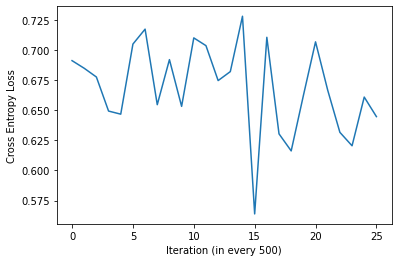

In [72]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [73]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'A2_Problem2_setting3.pkl') 

####Loading Model

In [74]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'A2_Problem2_setting3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


###Setting3:Four Layer Neural Network (Deep) with LeakyReLU and Sigmoid Activation  (Accuracy 62.73%)

batch size =64 ,iteration=8000,number of nodes per hidden layer=100, learning rate= 0.1

In [98]:
# Hyperparameters

batch_size = 64
num_iters = 8000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden=100
learning_rate = 0.1
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [100]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

16


Here we have used four hidden layers.  We have used LeakyReLU activation function in first three layers and sigmoid function in the last layer. 

**LeakyReLU** function applies the element-wise function:

$\text{LeakyReLU}(x) = \max(0, x) + \text{negative_slope} * \min(0, x)$

or

$\text{LeakyRELU}(x) = \begin{cases} x, & \text{ if } x \geq 0 \\ \text{negative_slope} \times x, & \text{ otherwise } \end{cases}$



<div align="center">
<img src="https://drive.google.com/uc?id=1mrXVaeMrCaMXDRy8-ZrBkyKY-qeYq9ki" width="500">
</div>
​	

**Sigmoid** function applies the element-wise function:

$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$

 <div align="center">
<img src="https://drive.google.com/uc?id=10yRhl8F7udNXYa4Yc_fLoJRNUlYJ4ere" width="400">
</div>


In [102]:

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.leaky_relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.leaky_relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.leaky_relu_3 = nn.LeakyReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.sigmoid = nn.Sigmoid()

        ### Output layer: 100 --> 2
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.leaky_relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.leaky_relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.leaky_relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.sigmoid(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7093263864517212. Accuracy: 50.081089847551084
Iteration: 1000. Loss: 0.687929630279541. Accuracy: 49.918910152448916
Iteration: 1500. Loss: 0.7135933041572571. Accuracy: 49.983782030489785
Iteration: 2000. Loss: 0.690620481967926. Accuracy: 59.130716834252354
Iteration: 2500. Loss: 0.6772160530090332. Accuracy: 50.82711644502108
Iteration: 3000. Loss: 0.6943079233169556. Accuracy: 58.57930587090496
Iteration: 3500. Loss: 0.6443530321121216. Accuracy: 60.78494972429452
Iteration: 4000. Loss: 0.5812816619873047. Accuracy: 60.979565358417126
Iteration: 4500. Loss: 0.6485410928726196. Accuracy: 61.69315601686669
Iteration: 5000. Loss: 0.6713210940361023. Accuracy: 62.89328576062277
Iteration: 5500. Loss: 0.6456020474433899. Accuracy: 62.30943885825495
Iteration: 6000. Loss: 0.6448523998260498. Accuracy: 62.21213104119364
Iteration: 6500. Loss: 0.6633709669113159. Accuracy: 62.7311060655206


#### Plot of predicted and actual values

[0.7093263864517212, 0.687929630279541, 0.7135933041572571, 0.690620481967926, 0.6772160530090332, 0.6943079233169556, 0.6443530321121216, 0.5812816619873047, 0.6485410928726196, 0.6713210940361023, 0.6456020474433899, 0.6448523998260498, 0.6633709669113159]


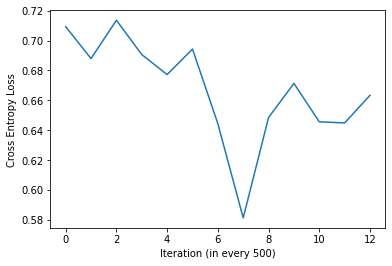

In [103]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [104]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'A2_Problem2_setting4.pkl') 

####Loading Model

In [105]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'A2_Problem2_setting4.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


###Setting 4: Three Layer Neural Network (Deep) with LeakyReLU and Tanh Activation (Accuracy 63.47%)

batch size =32 ,iteration=13000, number of nodes per hidden layer=200, learning rate= 0.01

In [121]:
# Hyperparameters

batch_size = 32
num_iters = 13000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden=200
learning_rate = 0.01
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [122]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

13


Here we have used four hidden layers.  We have used LeakyReLU activation function in first two layers and tanh function in the last layer. 

**LeakyReLU** function applies the element-wise function:

$\text{LeakyReLU}(x) = \max(0, x) + \text{negative_slope} * \min(0, x)$

or

$\text{LeakyRELU}(x) = \begin{cases} x, & \text{ if } x \geq 0 \\ \text{negative_slope} \times x, & \text{ otherwise } \end{cases}$


<div align="center">
<img src="https://drive.google.com/uc?id=1mrXVaeMrCaMXDRy8-ZrBkyKY-qeYq9ki" width="500">
</div>

**Tanh** function Applies the element-wise function:

$\text{Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}$

<div align="center">
<img src="https://drive.google.com/uc?id=1emyUQEa8OSYJrgyXLxutCGFwbYuvAm3i" width="400">
</div>

​	

In [123]:

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.leaky_relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.leaky_relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.tanh = nn.Tanh()

        ### Output layer: 200 --> 2
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.leaky_relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.leaky_relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.tanh(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6972432136535645. Accuracy: 50.82711644502108
Iteration: 1000. Loss: 0.6869933009147644. Accuracy: 57.73597145637366
Iteration: 1500. Loss: 0.6908228993415833. Accuracy: 58.87122932208887
Iteration: 2000. Loss: 0.664902925491333. Accuracy: 60.23353876094713
Iteration: 2500. Loss: 0.6557060480117798. Accuracy: 60.36328251702887
Iteration: 3000. Loss: 0.7089829444885254. Accuracy: 61.368796626662345
Iteration: 3500. Loss: 0.662083089351654. Accuracy: 60.84982160233539
Iteration: 4000. Loss: 0.7344433665275574. Accuracy: 60.84982160233539
Iteration: 4500. Loss: 0.6390346884727478. Accuracy: 62.244566980214074
Iteration: 5000. Loss: 0.6757344007492065. Accuracy: 62.04995134609147
Iteration: 5500. Loss: 0.6608097553253174. Accuracy: 62.27700291923451
Iteration: 6000. Loss: 0.6213651299476624. Accuracy: 62.568926370418424
Iteration: 6500. Loss: 0.687899112701416. Accuracy: 62.27700291923451
Iteration: 7000. Loss: 0.6843574643135071. Accuracy: 61.88777165098929
Iterati

#### Plot of predicted and actual values

[0.6972432136535645, 0.6869933009147644, 0.6908228993415833, 0.664902925491333, 0.6557060480117798, 0.7089829444885254, 0.662083089351654, 0.7344433665275574, 0.6390346884727478, 0.6757344007492065, 0.6608097553253174, 0.6213651299476624, 0.687899112701416, 0.6843574643135071, 0.6461949944496155, 0.6336478590965271, 0.6023199558258057, 0.6395676136016846, 0.5918339490890503, 0.6831656098365784, 0.6135663390159607, 0.5473183989524841]


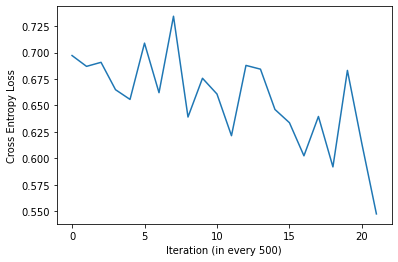

In [124]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [126]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'A2_Problem2_setting5.pkl') 

####Loading Model

In [127]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'A2_Problem2_setting5.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


##Analyzing the Tuning of Hyperparameters:


| Setting No.| Batch size | Dataset per batch | Iterations| Epochs| Learning rate    |Number of hideen layer|Number of Nodes per Hiddden layer|Activation Function |Accuracy| 
| :-------------: | :----------: | :-----------: | :-------------: | :----------: | :-----------: | :-----------: | :-----------: |:-----------: |:-----------: |
| 01 | 64 | 483 |  5000 |  10 | 0.1   | 2|200, 100|ReLU |61.43%   |
| 02 | 32 | 965 |  15000 | 15 | 0.01    | 3|200|LeakyReLU|62.56%   |
| 03 | 64 | 483 |  8000 | 16 | 0.1   | 4|100|LeakyReLU, Sigmoid|62.73%   |
| 04 | 32 | 965 |  13000 | 13 | 0.01    | 3|200|LeakyReLU, Tanh|**63.47%** |




Here, we can see the best accuracy among 4 settings is **63.47%.** We can analyze this taking each parameter in comparison.


- **Analyzing according to number of hidden layers:**

<div align="center">
<img src="https://drive.google.com/uc?id=1AYBk0NXqQQjhv_JthCBAJJge7LSp2paM" width="300">
</div>

Among the settings, we can see that the more we increase the number of hidden layer the more accuracy increases. It can say that if the hlayer number increases, the networks becomes more stronger and gives better result. But, it also depends  on the size of the dataset. For smaller experiment , a very complicated model becomes unnecessary and the result becomes overfitted. 

Also, it is related to the activation function. We can see that by using less hidden layer and using tanh instead of sigmoid by comparising 3 and 4 no. setting, we get better result.

- **Analyzing according to the number of nodes per hidden layer:**

In per hidden layer, the number of nodes may vary. By incresing the number of nodes, accuracy might increase. But again it depends on the size of the dataset. For smaller experiment , a very complicated model becomes unnecessary and the result becomes overfitted. The number nodes can be different for per hidden layer. As we can see in setting 1. So, it depends how we want to design our model.

- **Analyzing according to activation function:**

There are various kind of activation function from pytroch we can use.  [**LINK**](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) We have already known that ReLU is better than Sigmoid and Tanh and it is better to start with ReLU activation function. Because the calculation load is less than the sigmoid and hyperbolic tangent 
functions has led ReLu to a higher preference for multi-layer networks. Again, sometimes it is better to use different function in different layer. By doing that, in our case we get the best result using LeakyReLu and Tanh function. 

 In two setting we have used **ReLU** and in two other we have used **LeakyReLU** activation function. and we can see that LeakyReLu gives better result  than ReLU. Beacuse this variation of 
ReLU has a small positive slope in the negative 
area, so it does enable backpropagation, even for 
negative input values. This leaky value is given as 
a value of 0.01 if not +ve. 


- **Analyzing according to learning rate:**


<div align="center">
<img src="https://drive.google.com/uc?id=18Nopy5J3KiCAh_zLl_GRBiMMEObJ9pnj" width="300">
</div>

Generally, the more learning rate increases, the more accuracy increases. From this it is said that, A learning rate that is too low will take a long time to converge and not give a good result. But sometime higher learning rate may result to miss the global minima.In this experiment, we can see we get the best result from 0.01 though we have experimented 0.1.


- **Analyzing according to epochs:**


<div align="center">
<img src="https://drive.google.com/uc?id=1FIKTlibz1M_KZVL1-6rr_6BsDOMVCyq_" width="300">
</div>

In general, the models improve with more epochs of training, to a point.Here we can see, by increasing epoch we get better accuracy. They'll start to plateau in accuracy as they converge. But, at some point we will see as the epoch increases , accuracy decreases. So, we can say it is dataset dependent. After going to global minima, it starts to decrease again.


- **Analyzing according to batch size and iterations:**


<div align="center">
<img src="https://drive.google.com/uc?id=17hSngZ4qY9nBaJsCRIt2Xg6rnL2yrvJv" width="300">
</div>

In general, larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. So, it's definitely problem dependent.



- **Analyzing the graphs of all the settings according to loss functions:**

<div align="center">
<img src="https://drive.google.com/uc?id=1gJyqm0mMv9STrxnVGJTqTF-G-dc2qeS6" width="800">
</div>

From the above graphs, we can see that the more the model gets trained, the more loss function decreases i.e. gives better result. In some cases, the graph falcuates, but at some points loss function goes ~ 0, and give thebest accuracy.




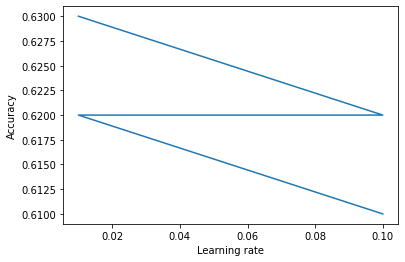

In [6]:
import matplotlib
import matplotlib.pyplot as plt
X=[0.1,0.01,0.1,0.01]
Y=[0.61,0.62,0.62,0.63]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

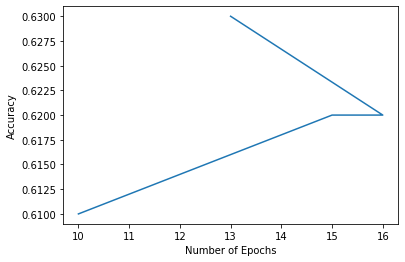

In [4]:
import matplotlib
import matplotlib.pyplot as plt
X=[10,15,16,13]
Y=[0.61,0.62,0.62,0.63]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

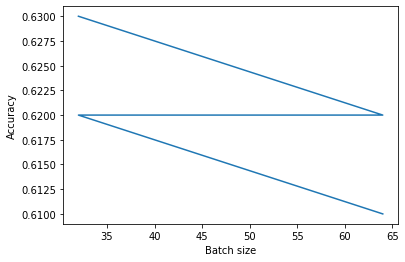

In [2]:
import matplotlib
import matplotlib.pyplot as plt
X=[64,32,64,32]
Y=[0.61,0.62,0.62,0.63]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.show()

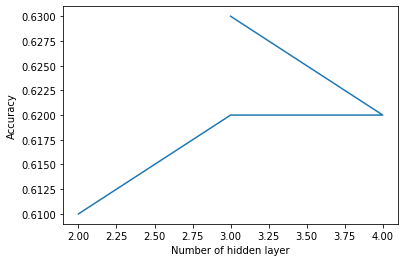

In [1]:
import matplotlib
import matplotlib.pyplot as plt
X=[2,3,4,3]
Y=[0.61,0.62,0.62,0.63]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Number of hidden layer')
plt.show()